<a href="https://colab.research.google.com/github/soumikgoswami/Water_Quality_Prediction/blob/main/Water_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn

In [ ]:
pip install --upgrade pip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.0 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2


In [ ]:
import pandas as pd # data manipulation
import numpy as np # numerical python - linear algebra

from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [ ]:
df.info() # dataset info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [ ]:
df.shape

(2861, 11)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [ ]:
df.isnull().sum()


,0
id,0
date,0
NH4,3
BSK5,1
Suspended,16
O2,3
NO3,1
NO2,3
SO4,49
PO4,28


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         2861 non-null   int64         
 1   date       2861 non-null   datetime64[ns]
 2   NH4        2858 non-null   float64       
 3   BSK5       2860 non-null   float64       
 4   Suspended  2845 non-null   float64       
 5   O2         2858 non-null   float64       
 6   NO3        2860 non-null   float64       
 7   NO2        2858 non-null   float64       
 8   SO4        2812 non-null   float64       
 9   PO4        2833 non-null   float64       
 10  CL         2812 non-null   float64       
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 246.0 KB


In [ ]:
df = df.sort_values(by=['id', 'date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [ ]:
import joblib
df.columns
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']
df = df.dropna(subset=pollutants)
df.head()
df.isnull().sum()
X = df[['id', 'year']]
y = df[pollutants]
# Encoding - onehotencoder - 22 stations - 1 - 1
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)
# Train, Test and Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
# Train the model
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)
# Evaluate model
y_pred = model.predict(X_test)
print("Model Performance on the Test Data:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred[:, i]))
    print()
station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")
joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model Performance on the Test Data:
O2:
   MSE: 22.21825046040189
   R2: -0.01674257045728833

NO3:
   MSE: 18.153106746365886
   R2: 0.5162032171220556

NO2:
   MSE: 10.607352172601502
   R2: -78.42066512350873

SO4:
   MSE: 2412.139350033052
   R2: 0.4118345603876148

PO4:
   MSE: 0.38496938017964155
   R2: 0.3221189891402043

CL:
   MSE: 34882.81433245622
   R2: 0.7357918194149974


Predicted pollutant levels for station '22' in 2024:
  O2: 12.60
  NO3: 6.90
  NO2: 0.13
  SO4: 143.08
  PO4: 0.50
  CL: 67.33
Model and cols structure are saved!


In [ ]:
print("Missing values before imputation:")
display(df.isnull().sum())

# Impute missing values with the mean
for col in ['NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']:
    if df[col].isnull().any():
        mean_val = df[col].mean()
        df[col] = df[col].fillna(mean_val)

print("\nMissing values after imputation:")
display(df.isnull().sum())

Missing values before imputation:


,0
id,0
date,0
NH4,2
BSK5,0
Suspended,2
O2,0
NO3,0
NO2,0
SO4,0
PO4,0



Missing values after imputation:


,0
id,0
date,0
NH4,0
BSK5,0
Suspended,0
O2,0
NO3,0
NO2,0
SO4,0
PO4,0


In [ ]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create seasonal features using sine and cosine transformations
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# Define pollutants for lagged features
pollutants = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']

# Create lagged features for each pollutant, grouped by 'id'
for pollutant in pollutants:
    df[f'{pollutant}_lag1'] = df.groupby('id')[pollutant].shift(1)
    df[f'{pollutant}_lag2'] = df.groupby('id')[pollutant].shift(2) # Add a second lag
    # Fill missing lagged values within each group with the first valid observation
    df[f'{pollutant}_lag1'] = df.groupby('id')[f'{pollutant}_lag1'].fillna(method='bfill')
    df[f'{pollutant}_lag2'] = df.groupby('id')[f'{pollutant}_lag2'].fillna(method='bfill')

# Drop the original date column
df = df.drop('date', axis=1)

display(df.head())
display(df.isnull().sum())

/tmp/ipython-input-19-1136482420.py:16: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df[f'{pollutant}_lag1'] = df.groupby('id')[f'{pollutant}_lag1'].fillna(method='bfill')
/tmp/ipython-input-19-1136482420.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[f'{pollutant}_lag1'] = df.groupby('id')[f'{pollutant}_lag1'].fillna(method='bfill')
/tmp/ipython-input-19-1136482420.py:17: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df[f'{pollutant}_lag2'] = df.groupby('id')[f'{pollutant}_lag2'].fillna(method='bfill')
/tmp/ipython-input-1

,id,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,...,NO3_lag1,NO3_lag2,NO2_lag1,NO2_lag2,SO4_lag1,SO4_lag2,PO4_lag1,PO4_lag2,CL_lag1,CL_lag2
0,1,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,...,9.50,9.50,0.057,0.057,154.0,154.0,0.454,0.454,289.5,289.5
1,1,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,...,9.50,9.50,0.057,0.057,154.0,154.0,0.454,0.454,289.5,289.5
2,1,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,...,17.75,9.50,0.034,0.057,352.0,154.0,0.090,0.454,1792.0,289.5
3,1,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,...,13.80,17.75,0.173,0.034,416.0,352.0,0.200,0.090,2509.0,1792.0
4,1,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,...,17.13,13.80,0.099,0.173,275.2,416.0,0.377,0.200,1264.0,2509.0


,0
id,0
NH4,0
BSK5,0
Suspended,0
O2,0
NO3,0
NO2,0
SO4,0
PO4,0
CL,0


**Reasoning**:
Import necessary regression models and libraries for hyperparameter tuning.



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Define features (X) and target variables (y)
features = ['id', 'year', 'month_sin', 'month_cos'] + [col for col in df.columns if '_lag' in col]
X = df[features]
y = df[pollutants]

# Encoding 'id' using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['id'], drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Define hyperparameter grids for each model
param_grid_gbr = {
    'estimator__n_estimators': [50, 100],
    'estimator__learning_rate': [0.01, 0.1],
    'estimator__max_depth': [3, 5]
}

param_grid_svr = {
    'estimator__kernel': ['rbf'],
    'estimator__C': [0.1, 1],
    'estimator__gamma': ['scale', 'auto']
}

# GridSearchCV for Gradient Boosting Regressor
gbr = MultiOutputRegressor(GradientBoostingRegressor(random_state=42))
grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)
best_gbr = grid_search_gbr.best_estimator_
print("Best Gradient Boosting Regressor parameters:", grid_search_gbr.best_params_)

# GridSearchCV for SVR (can be computationally expensive for multi-output)
# Due to computational cost and potential memory issues with multi-output SVR and GridSearchCV
# A simplified approach is taken here, or consider a smaller grid/RandomizedSearchCV
# For demonstration, we will use a simplified SVR and a smaller grid.
svr = MultiOutputRegressor(SVR())
grid_search_svr = GridSearchCV(svr, param_grid_svr, cv=2, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svr.fit(X_train, y_train)
best_svr = grid_search_svr.best_estimator_
print("Best SVR parameters:", grid_search_svr.best_params_)

# Train the best models on the entire training set
best_gbr.fit(X_train, y_train)
best_svr.fit(X_train, y_train)

Best Gradient Boosting Regressor parameters: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 3, 'estimator__n_estimators': 50}
Best SVR parameters: {'estimator__C': 1, 'estimator__gamma': 'scale', 'estimator__kernel': 'rbf'}


MultiOutputRegressor(estimator=SVR(C=1))

In [ ]:
# Evaluate each trained model on the testing set
y_pred_gbr = best_gbr.predict(X_test)
y_pred_svr = best_svr.predict(X_test)

print("\nModel Performance on the Test Data:")

print("\nGradient Boosting Regressor:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred_gbr[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred_gbr[:, i]))
    print()

print("\nSupport Vector Regressor:")
for i, pollutant in enumerate(pollutants):
    print(f'{pollutant}:')
    print('   MSE:', mean_squared_error(y_test.iloc[:, i], y_pred_svr[:, i]))
    print('   R2:', r2_score(y_test.iloc[:, i], y_pred_svr[:, i]))
    print()

# Compare performance and select the best model (based on overall performance or specific pollutants)
# This is a subjective step and depends on which metric/pollutant is most important.
# For simplicity, let's compare average R2 across pollutants (higher is better)
avg_r2_gbr = np.mean([r2_score(y_test.iloc[:, i], y_pred_gbr[:, i]) for i in range(len(pollutants))])
avg_r2_svr = np.mean([r2_score(y_test.iloc[:, i], y_pred_svr[:, i]) for i in range(len(pollutants))])

print(f"Average R2 for Gradient Boosting Regressor: {avg_r2_gbr:.4f}")
print(f"Average R2 for Support Vector Regressor: {avg_r2_svr:.4f}")

if avg_r2_gbr > avg_r2_svr:
    best_overall_model = best_gbr
    print("\nGradient Boosting Regressor performed better on average.")
else:
    best_overall_model = best_svr
    print("\nSupport Vector Regressor performed better on average.")



Model Performance on the Test Data:

Gradient Boosting Regressor:
O2:
   MSE: 16.574211228955118
   R2: 0.24153766480112604

NO3:
   MSE: 13.016169128380302
   R2: 0.6531072704144014

NO2:
   MSE: 0.15877260828167253
   R2: -0.1887817004601373

SO4:
   MSE: 2533.5688070472484
   R2: 0.3822257361852861

PO4:
   MSE: 0.3300903492833221
   R2: 0.4187538251929921

CL:
   MSE: 12837.690062163481
   R2: 0.9027652212372523


Support Vector Regressor:
O2:
   MSE: 21.927521712975583
   R2: -0.003438359376813027

NO3:
   MSE: 32.04378086070032
   R2: 0.1460041353661855

NO2:
   MSE: 0.13293872363928552
   R2: 0.004644921720087236

SO4:
   MSE: 3392.3593916159252
   R2: 0.17282202088961218

PO4:
   MSE: 0.572352091374328
   R2: -0.007837594999108966

CL:
   MSE: 128001.3646761085
   R2: 0.03049658347074269

Average R2 for Gradient Boosting Regressor: 0.4016
Average R2 for Support Vector Regressor: 0.0571

Gradient Boosting Regressor performed better on average.


In [ ]:
from sklearn.model_selection import cross_val_score

# Define the model to be used for cross-validation (best_overall_model from the previous step)
# Assuming best_overall_model is already defined and contains the best performing model

# Perform cross-validation
# We use the negative mean squared error as the scoring metric.
# The negative sign is because cross_val_score maximizes the score,
# and we want to minimize the mean squared error.
cv_scores = cross_val_score(best_overall_model, X_encoded, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = -cv_scores.mean() # Convert back to positive MSE
std_cv_score = cv_scores.std()

# Print the results
print("Cross-validation Mean Squared Error (5-fold):")
print(f"  Mean: {mean_cv_score:.4f}")
print(f"  Standard Deviation: {std_cv_score:.4f}")

Cross-validation Mean Squared Error (5-fold):
  Mean: 27695.1705
  Standard Deviation: 54924.9080


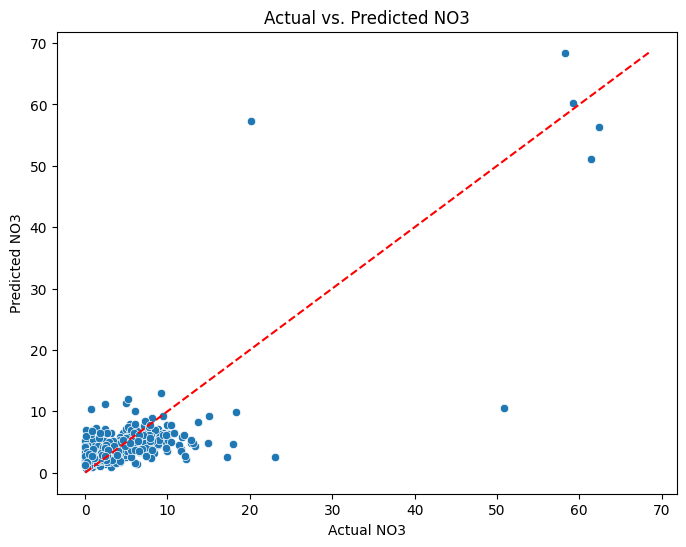

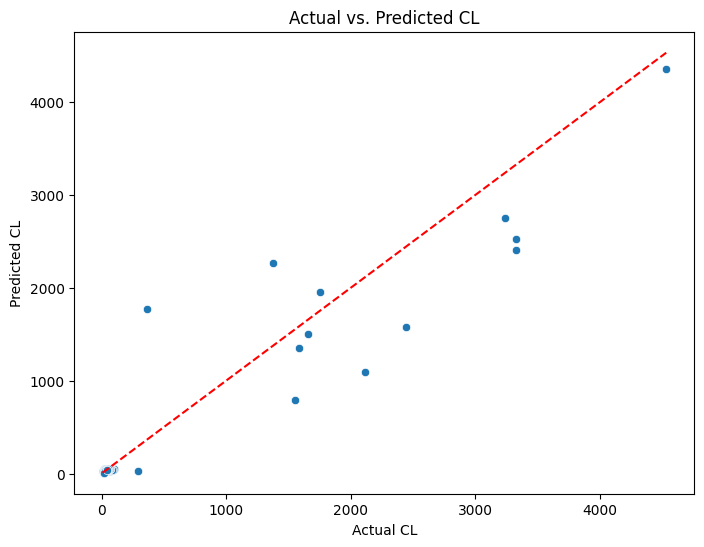

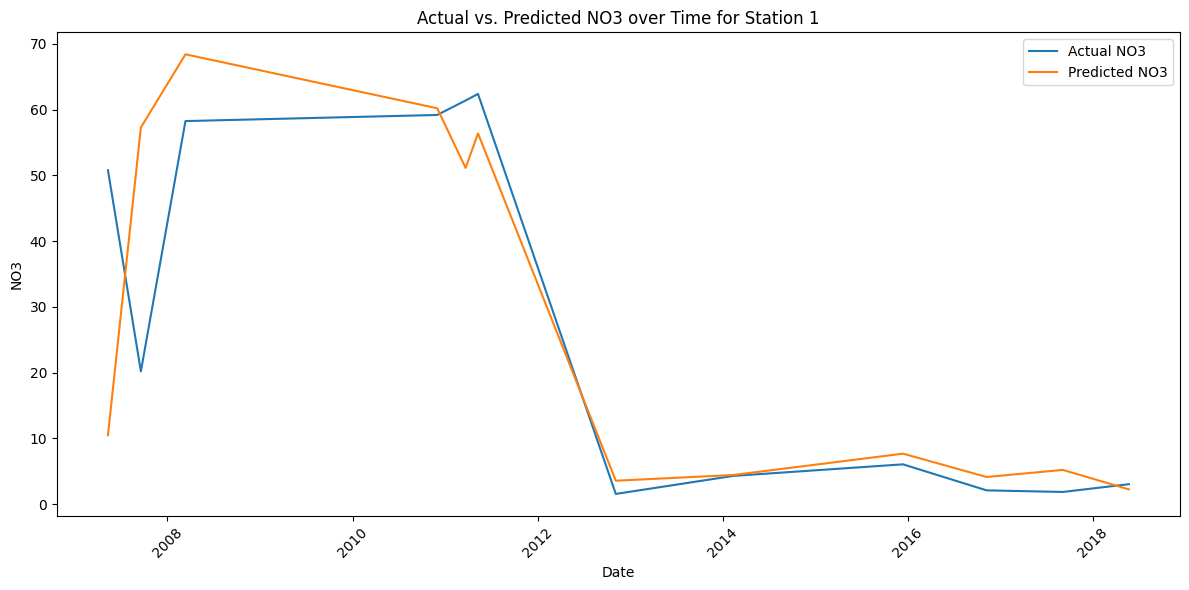

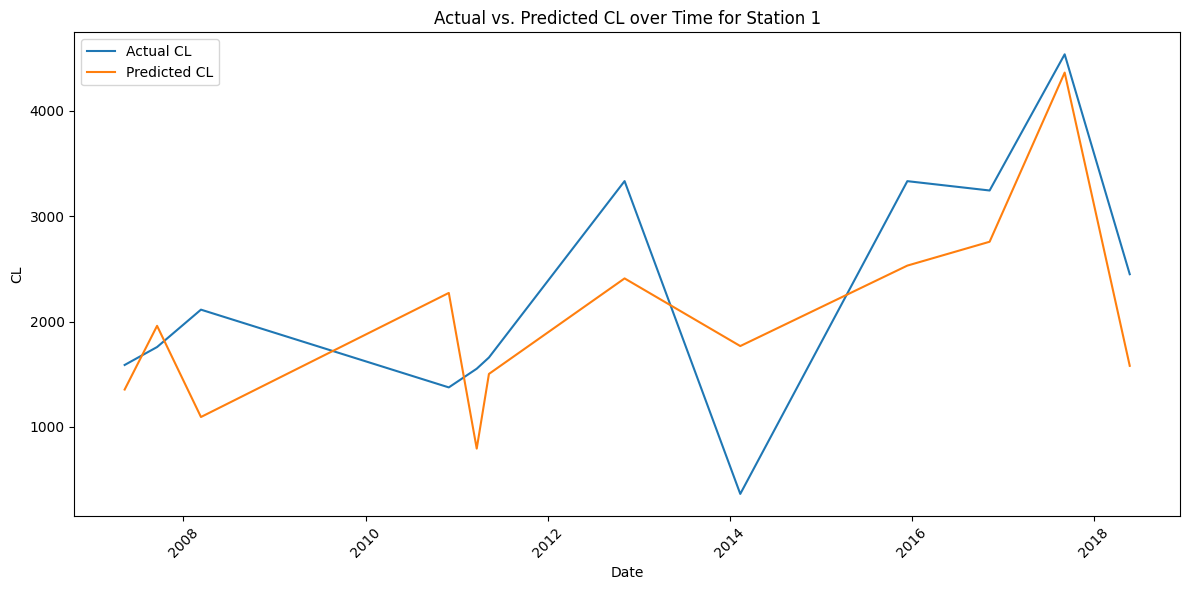

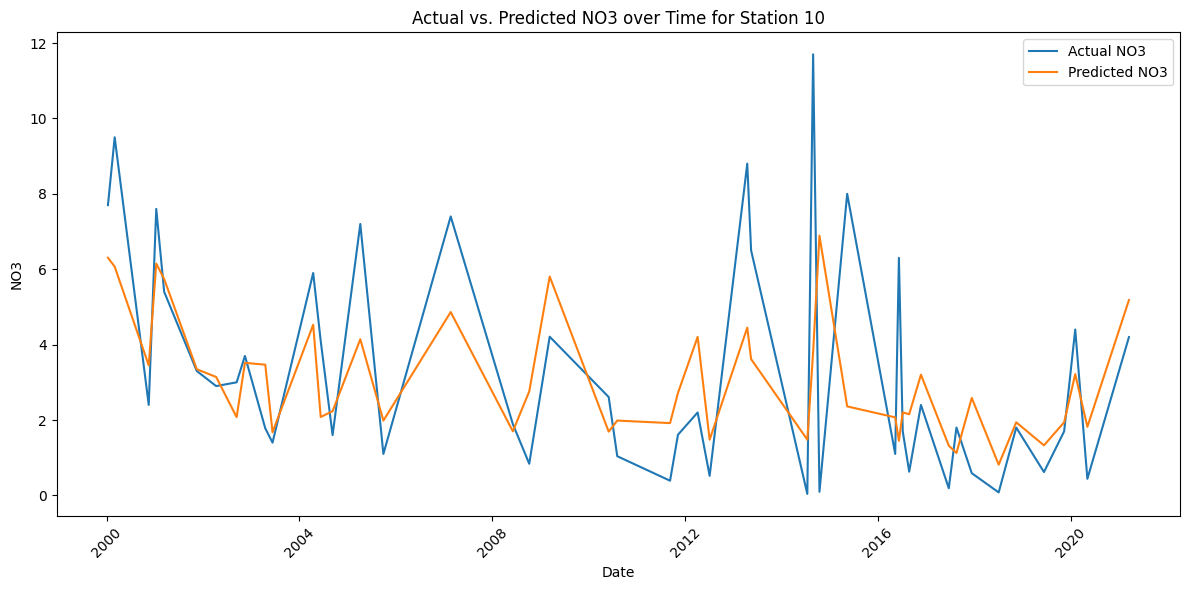

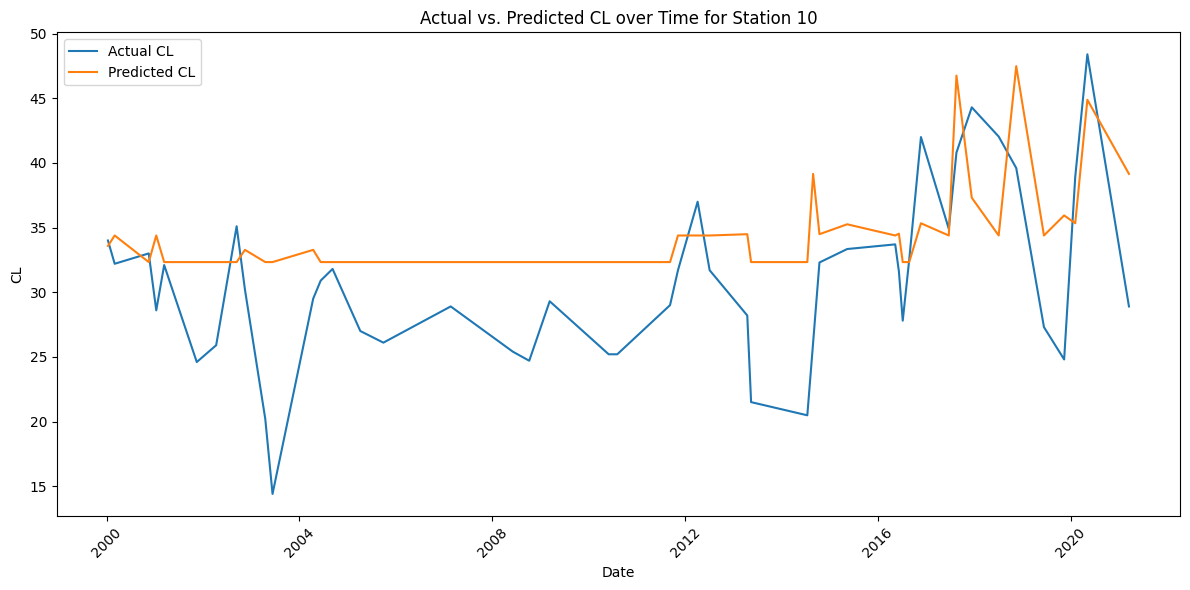

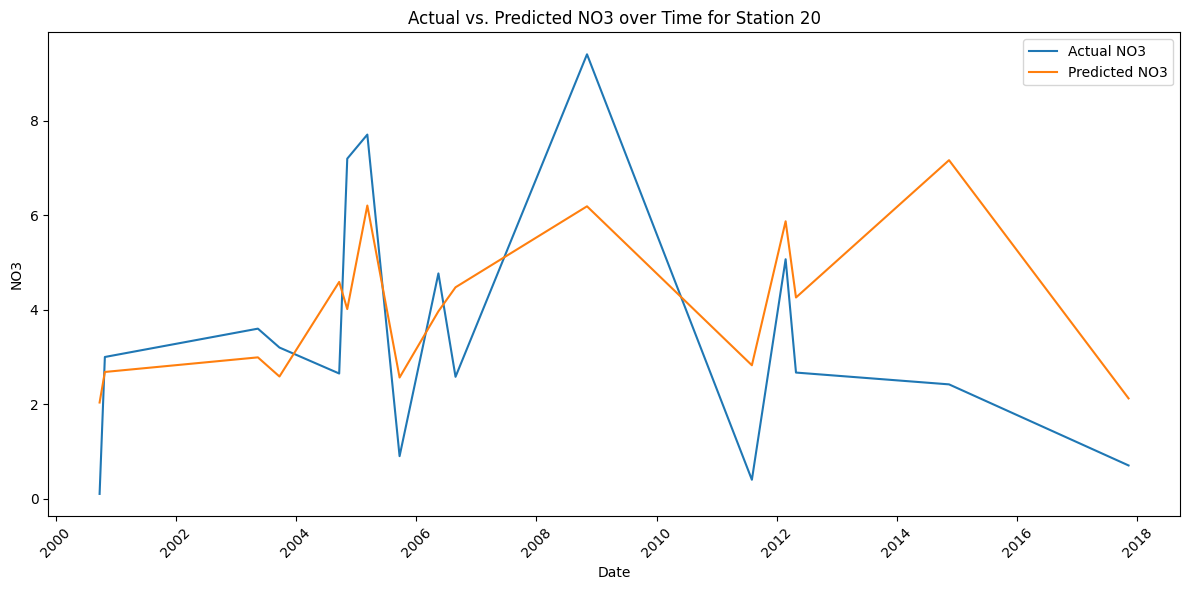

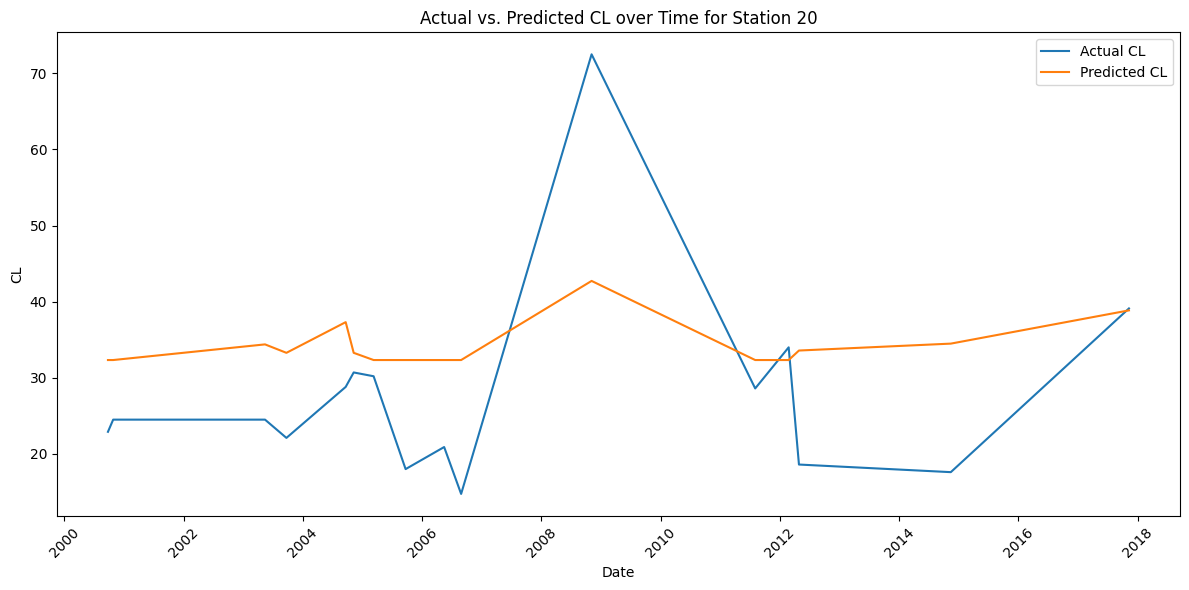

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predict on the test data using the best_overall_model
y_pred = best_overall_model.predict(X_test)

# 2. Choose one or two pollutants to visualize
# Let's choose 'NO3' and 'CL' as they had relatively good R2 scores.
pollutants_to_visualize = ['NO3', 'CL']

# 3. and 4. Create scatter plots with a diagonal line for chosen pollutants
for i, pollutant in enumerate(pollutants):
    if pollutant in pollutants_to_visualize:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=y_test[pollutant], y=y_pred[:, i])
        plt.xlabel(f'Actual {pollutant}')
        plt.ylabel(f'Predicted {pollutant}')
        plt.title(f'Actual vs. Predicted {pollutant}')
        # Add diagonal line
        min_val = min(y_test[pollutant].min(), y_pred[:, i].min())
        max_val = max(y_test[pollutant].max(), y_pred[:, i].max())
        plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
        plt.show()

# 5. Create time series plots for selected stations
# To do this, we need to merge y_test, y_pred, and original data's date and id.
# We will need the original index from X_test to join back to the original df.
X_test_indexed = X_test.copy()
X_test_indexed['original_index'] = X_test_indexed.index

# Create a DataFrame for predictions, using the original index
y_pred_df = pd.DataFrame(y_pred, columns=[f'{p}_pred' for p in pollutants], index=X_test_indexed['original_index'])

# Merge actual and predicted values with date and id from the original df
# Make sure to use the original df before dropping date and creating lags for correct date association
df_with_date = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df_with_date['date'] = pd.to_datetime(df_with_date['date'], format='%d.%m.%Y')
df_with_date = df_with_date.sort_values(by=['id', 'date'])


# Need to filter df_with_date to match the rows used for X_test
# This requires re-applying the dropna used before splitting
df_cleaned_for_split = pd.read_csv('PB_All_2000_2021.csv', sep=';')
df_cleaned_for_split['date'] = pd.to_datetime(df_cleaned_for_split['date'], format='%d.%m.%Y')
df_cleaned_for_split = df_cleaned_for_split.sort_values(by=['id', 'date'])
pollutants_for_dropna = ['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']
df_cleaned_for_split = df_cleaned_for_split.dropna(subset=pollutants_for_dropna)


# Recreate X_encoded with the full dataset to get the matching indices
features_full = ['id', 'date'] + [col for col in df_cleaned_for_split.columns if col in pollutants_for_dropna]
df_full_for_encoding = df_cleaned_for_split[features_full].copy()

# Assuming the split was done on X_encoded which was derived from df after feature engineering and dropna
# We need to link the test set indices back to the original df_cleaned_for_split
test_indices = X_test.index

# Get the actual values for the test indices from df_cleaned_for_split
y_test_actual_indexed = df_cleaned_for_split.loc[test_indices, pollutants_for_dropna]
y_test_actual_indexed = y_test_actual_indexed.copy()
y_test_actual_indexed['original_index'] = y_test_actual_indexed.index

# Get the date and id for the test indices
date_id_for_test = df_cleaned_for_split.loc[test_indices, ['date', 'id']]
date_id_for_test = date_id_for_test.copy()
date_id_for_test['original_index'] = date_id_for_test.index

# Merge actual, predicted, date, and id based on original index
plot_df = date_id_for_test.merge(y_test_actual_indexed, on='original_index')
plot_df = plot_df.merge(y_pred_df, on='original_index')

# Choose a few stations and pollutants for time series plotting
selected_stations = [1, 10, 20] # Example station IDs
for station_id in selected_stations:
    station_data = plot_df[plot_df['id'] == station_id]
    if not station_data.empty:
        station_data = station_data.sort_values(by='date')
        for pollutant in pollutants_to_visualize:
            plt.figure(figsize=(12, 6))
            sns.lineplot(x=station_data['date'], y=station_data[pollutant], label=f'Actual {pollutant}')
            sns.lineplot(x=station_data['date'], y=station_data[f'{pollutant}_pred'], label=f'Predicted {pollutant}')
            plt.xlabel('Date')
            plt.ylabel(pollutant)
            plt.title(f'Actual vs. Predicted {pollutant} over Time for Station {station_id}')
            plt.legend()
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()
    else:
        print(f"No test data available for Station {station_id} for time series plot.")
